In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import mdtraj as md
import os
import sys
import numpy as np
import scipy as sp
from scipy import optimize
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import math
import itertools
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq

In [3]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")

In [4]:
prot_res_renum = array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40,  1,  6, 13, 14])

In [5]:
outdir = '/Users/kaushikborthakur1211/Desktop/Paper_Repo/Ab40/'

In [6]:
weights_disp = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/Ab40/a99SBdisp/reweight_trial/weights/combined_data/CA-CB-H-JHNHA-HA-N-RDC/weights_final.dat')
weights_c22star = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/Ab40/c22star-TIP3P/reweight_trial/weights/combined_data/CA-CB-H-JHNHA-HA-N-RDC/weights_final.dat')
weights_c36m = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/Ab40/Charmm36m/reweight_trial/weights/combined_data/CA-CB-H-JHNHA-HA-N-RDC/weights_final.dat')

In [7]:
dsspH_disp = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/Ab40/a99SBdisp/reweight_trial/ensembles/dssp.H.dat')
dsspH_c22star = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/Ab40/c22star-TIP3P/reweight_trial/ensembles/dssp.H.dat')
dsspH_c36m = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/Ab40/Charmm36m/reweight_trial/ensembles/dssp.H.dat')

dsspE_disp = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/Ab40/a99SBdisp/reweight_trial/ensembles/dssp.E.dat')
dsspE_c22star = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/Ab40/c22star-TIP3P/reweight_trial/ensembles/dssp.E.dat')
dsspE_c36m = np.loadtxt('/Users/kaushikborthakur1211/Desktop/Paper_Repo/Ab40/Charmm36m/reweight_trial/ensembles/dssp.E.dat')

In [8]:
Hprop_disp = np.sum(dsspH_disp,axis=0).astype(float)/len(dsspH_disp)
Hprop_c22star = np.sum(dsspH_c22star, axis=0).astype(float)/len(dsspH_c22star)
Hprop_c36m = np.sum(dsspH_c36m, axis=0).astype(float)/len(dsspH_c36m)


Eprop_disp = np.sum(dsspE_disp,axis=0).astype(float)/len(dsspE_disp)
Eprop_c22star = np.sum(dsspE_c22star, axis=0).astype(float)/len(dsspE_c22star)
Eprop_c36m = np.sum(dsspE_c36m, axis=0).astype(float)/len(dsspE_c36m)


In [9]:
reweight_Hprop_disp=[]
reweight_Eprop_disp=[]
for i in range(0,len(Hprop_disp)):
    reweight_Hprop_disp.append(np.dot(dsspH_disp[:,i],weights_disp))
    reweight_Eprop_disp.append(np.dot(dsspE_disp[:,i],weights_disp))


reweight_Hprop_c22star=[]
reweight_Eprop_c22star=[]
for i in range(0,len(Hprop_c22star)):
    reweight_Hprop_c22star.append(np.dot(dsspH_c22star[:,i],weights_c22star))
    reweight_Eprop_c22star.append(np.dot(dsspE_c22star[:,i],weights_c22star))

reweight_Hprop_c36m=[]
reweight_Eprop_c36m=[]
for i in range(0,len(Hprop_c36m)):
    reweight_Hprop_c36m.append(np.dot(dsspH_c36m[:,i],weights_c36m))
    reweight_Eprop_c36m.append(np.dot(dsspE_c36m[:,i],weights_c36m))


In [10]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5

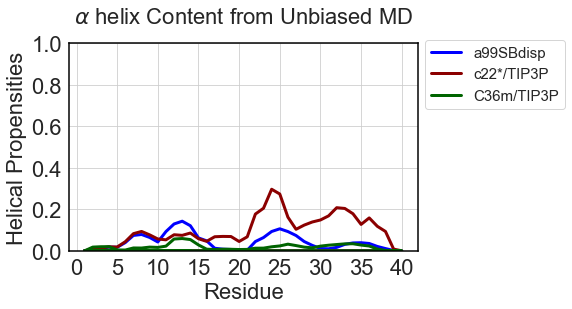

In [11]:
plt.plot(prot_res_renum, Hprop_disp, color='blue', label='a99SBdisp', linewidth=3.0)
plt.plot(prot_res_renum, Hprop_c22star, color='darkred', label='c22*/TIP3P',linewidth=3.0)
plt.plot(prot_res_renum, Hprop_c36m, color='darkgreen', label='C36m/TIP3P',linewidth=3.0)
plt.ylim(0,1.0)
plt.xlabel('Residue', size=22)
plt.ylabel('Helical Propensities', size=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor= (1.0, 0.85), fontsize=15)
plt.title(r"$\alpha$ helix Content from Unbiased MD", fontsize=22, pad=20)
plt.savefig(outdir+'/helix_comparison.pdf', bbox_inches='tight')

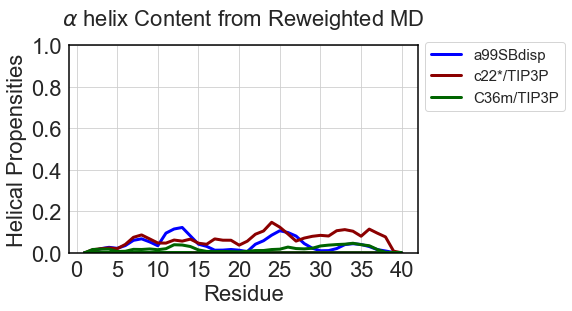

In [12]:
plt.plot(prot_res_renum, reweight_Hprop_disp, color='blue', label='a99SBdisp',linewidth=3.0)
plt.plot(prot_res_renum, reweight_Hprop_c22star, color='darkred', label='c22*/TIP3P',linewidth=3.0)
plt.plot(prot_res_renum, reweight_Hprop_c36m, color='darkgreen', label='C36m/TIP3P',linewidth=3.0)
plt.ylim(0,1.0)
plt.xlabel('Residue', size=22)
plt.ylabel('Helical Propensities', size=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor= (1.0, 0.85), fontsize=15)
plt.title(r"$\alpha$ helix Content from Reweighted MD", fontsize=22, pad=20)
plt.savefig(outdir+'/reweighted_helix_comparison.pdf', bbox_inches='tight')

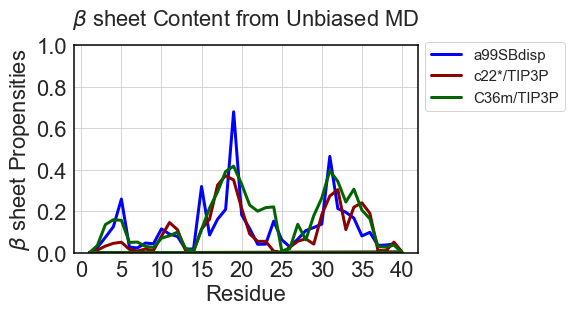

In [13]:
plt.plot(prot_res_renum, Eprop_disp, color='blue', label='a99SBdisp',linewidth=3.0)
plt.plot(prot_res_renum, Eprop_c22star, color='darkred', label='c22*/TIP3P',linewidth=3.0)
plt.plot(prot_res_renum, Eprop_c36m, color='darkgreen', label='C36m/TIP3P',linewidth=3.0)
plt.ylim(0,1.0)
plt.xlabel('Residue', size=22)
plt.ylabel(r'$\beta$ sheet Propensities', size=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor= (1.0, 0.85), fontsize=15)
plt.title(r"$\beta$ sheet Content from Unbiased MD", fontsize=22, pad=20)
plt.savefig(outdir+'/sheet_comparison.pdf',bbox_inches='tight')

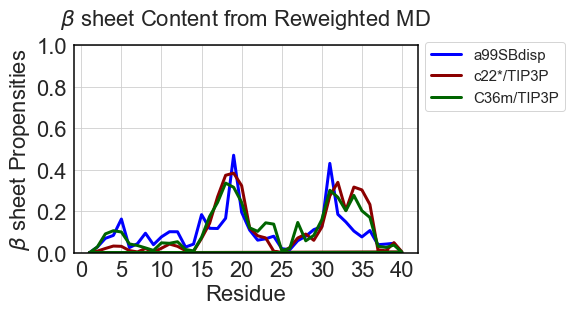

In [14]:
plt.plot(prot_res_renum, reweight_Eprop_disp, color='blue', label='a99SBdisp',linewidth=3.0)
plt.plot(prot_res_renum, reweight_Eprop_c22star, color='darkred', label='c22*/TIP3P',linewidth=3.0)
plt.plot(prot_res_renum, reweight_Eprop_c36m, color='darkgreen', label='C36m/TIP3P',linewidth=3.0)
plt.ylim(0,1.0)
plt.xlabel('Residue', size=22)
plt.ylabel(r'$\beta$ sheet Propensities', size=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor= (1.0, 0.85), fontsize=15)
plt.title(r"$\beta$ sheet Content from Reweighted MD", fontsize=22, pad=20)
plt.savefig(outdir+'/reweighted_sheet_comparison.pdf',bbox_inches='tight')

In [15]:
from openpyxl import load_workbook

In [17]:
wb = load_workbook('/Users/kaushikborthakur1211/Desktop/Paper_Repo/source_data.xlsx')

ws2 = wb.create_sheet('Fig 1D')

reweight_Eprop_disp = reweight_Eprop_disp[:-4]
reweight_Eprop_c22star = reweight_Eprop_c22star[:-4]
reweight_Eprop_c36m = reweight_Eprop_c36m[:-4]

ws2.append(["residue", "sheet_disp_rwt", "sheet_c22_rwt", "sheet_c36_rwt"])

for i in range(len(residues)):
    ws2.append([residues[i], reweight_Eprop_disp[i], reweight_Eprop_c22star[i], reweight_Eprop_c36m[i]])
    
wb.save('/Users/kaushikborthakur1211/Desktop/Paper_Repo/source_data.xlsx')


In [18]:
wb = load_workbook('/Users/kaushikborthakur1211/Desktop/Paper_Repo/source_data.xlsx')

ws2 = wb.create_sheet('SI Fig 4')

Hprop_disp = Hprop_disp[:-4]
Hprop_c22star = Hprop_c22star[:-4]
Hprop_c36m = Hprop_c36m[:-4]


reweight_Hprop_disp = reweight_Hprop_disp[:-4]
reweight_Hprop_c22star = reweight_Hprop_c22star[:-4]
reweight_Hprop_c36m = reweight_Hprop_c36m[:-4]

ws2.append(["residue", "helix_disp", "helix_c22","helix_c36m" ,"helix_disp_rwt", "helix_c22_rwt", "helix_c36_rwt"])

for i in range(len(residues)):
    ws2.append([residues[i], Hprop_disp[i], Hprop_c22star[i],Hprop_c36m[i], reweight_Hprop_disp[i], reweight_Hprop_c22star[i], reweight_Hprop_c36m[i]])
    
wb.save('/Users/kaushikborthakur1211/Desktop/Paper_Repo/source_data.xlsx')

